In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro
import statsmodels.api as sm

In [2]:
# Read case data
df = pd.read_excel("5. Case 4 - Paired samples t-test.xlsx")

In [3]:
# Print data head
df.head()

,Customer ID,AOV_Before,AOV_After,AOV_Diff
0,43300313,114.17,126.08,11.91
1,8873290,132.21,90.30,-41.91
2,14352336,95.76,116.40,20.64
3,14864842,89.12,122.68,33.56
4,59734862,123.10,141.26,18.16


-	AOV_Before: Average Order Value of the last three customer purchases before receiving the email
-	AOV_After: Average Order Value of the last three customer purchases after receiving the email
-	AOV_Diff = AOV_After - AOV_Before: Difference in Customer Average Order Value -> dependent variable

In [4]:
# Create arrays
data_diff = df["AOV_Diff"].values
data_before = df["AOV_Before"].values
data_after = df["AOV_After"].values

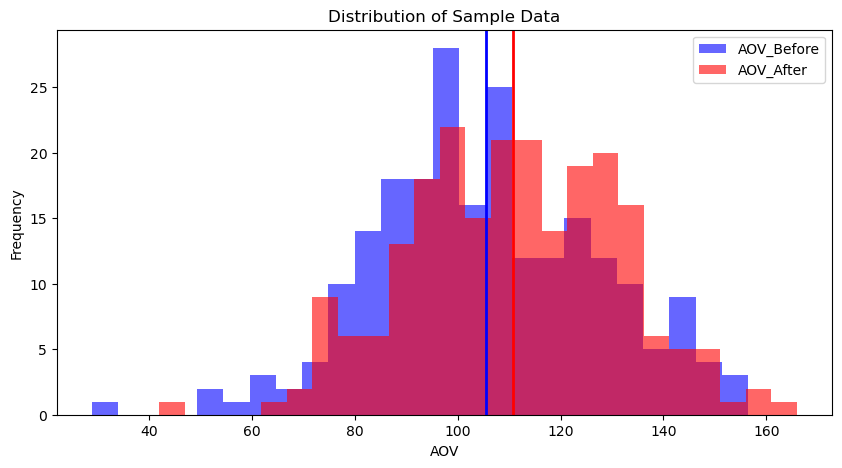

In [5]:
# Plot the histogram of before and after
plt.figure(figsize=(10,5))
plt.hist(data_before, bins=25, alpha=0.6, color='b',label="AOV_Before")
plt.hist(data_after, bins=25, alpha=0.6, color='r',label="AOV_After")

# Add the mean values for before and after
plt.axvline(data_before.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(data_after.mean(), color='r', linestyle='solid', linewidth=2)

# Label axis and add title
plt.xlabel('AOV')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Data')

plt.legend()
plt.show()

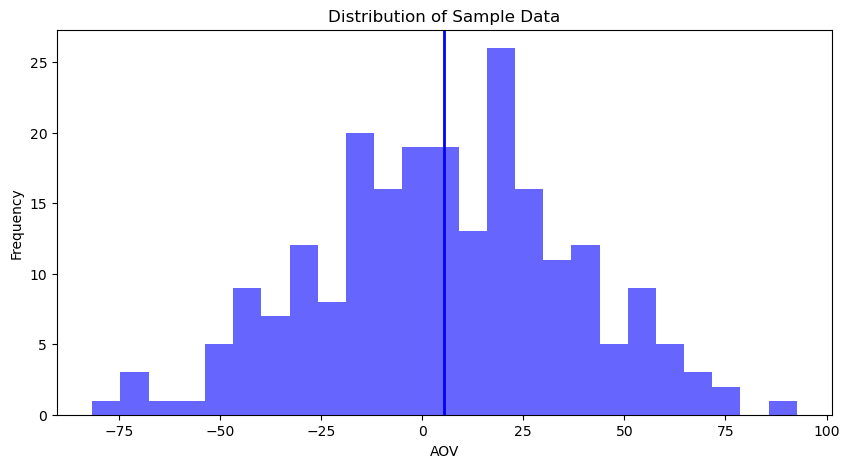

In [6]:
# Plot the histogram of the difference
plt.figure(figsize=(10,5))
plt.hist(data_diff, bins=25, alpha=0.6, color='b')
plt.axvline(data_diff.mean(), color='b', linestyle='solid', linewidth=2)

# Label axis and add title
plt.xlabel('AOV')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Data')

plt.show()

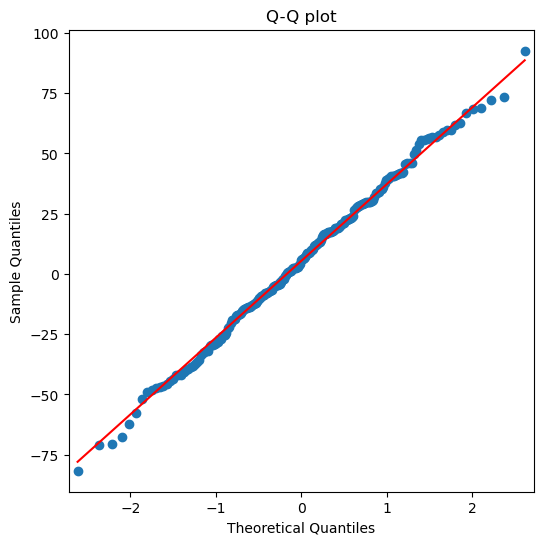

In [7]:
# Create Q-Q plot
fig, ax = plt.subplots(figsize=(6,6))
sm.qqplot(data_diff, line='s', ax=ax, fmt='b')

# Set the chart title and axis labels
ax.set_title("Q-Q plot")

# Display the chart
plt.show()

The dependent variable looks normally distributed based on the Q-Q plot. Let's perform a Shapiro-Wilk test to double-check, setting the significance level alpha to 0.05.

In [8]:
# Run Shapiro-Wilk test for normality
shapiro(data_diff)

ShapiroResult(statistic=0.9965303791568604, pvalue=0.9023164678422996)

The p-value is higher than 0.05, confirming that the variable is normally distributed.